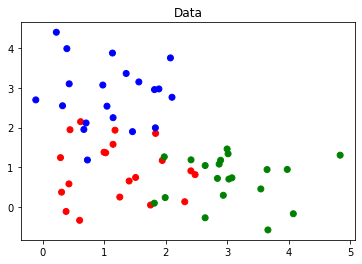

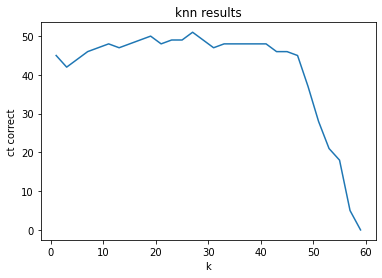

In [8]:
import random
from collections import namedtuple, Counter
import matplotlib.pyplot as plt

def fuzz(k):
    return k*random.gauss(0,1)

Instance = namedtuple('Instance', ['x', 'y', 'label'])

def make_data(centers, n=20, k=0.7):
    data = []
    for x, y, label in centers:
        for _ in range(n):
            data.append(Instance(x + fuzz(k), y + fuzz(k), label))
    return data

def distance(i1, i2):
    return (sum([(i1.x - i2.x)**2, (i1.y - i2.y)**2]))**0.5

def most_votes(labels):
    votes = Counter(labels)
    _, winning_ct = votes.most_common(1)[0]
    winners = [label for label, ct in votes.items() if ct == winning_ct]
    if len(winners) == 1:
        return winners[0]
    return most_votes(labels[:-1])

def knn(k, data, instance):
    sorted_data = sorted(data, key=lambda i: distance(i, instance))
    labels = [i.label for i in sorted_data[:k]]
    return most_votes(labels)

def run_test(data):
    ks, results = [], []
    for i in range(len(data)//2):
        k = 2*i + 1
        ct_correct = 0
        for instance in data:
            other_data = [i for i in data if i != instance]
            pred = knn(k, other_data, instance)
            if pred == instance.label:
                ct_correct += 1
        ks.append(k)
        results.append(ct_correct)
    return ks, results

centers = [(1, 1, 'red'), (1, 3, 'blue'), (3, 1, 'green')]
data = make_data(centers)
plt.scatter([i.x for i in data], [i.y for i in data], color=[i.label for i in data])
plt.title('Data')
plt.show()
ks, results = run_test(data)
plt.plot(ks, results)
plt.title('knn results')
plt.xlabel('k')
plt.ylabel('ct correct');